In [1]:
%load_ext watermark
%watermark

Last updated: 2022-02-08T14:33:58.570728-03:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 11, GenuineIntel
CPU cores   : 4
Architecture: 64bit



In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)

In [3]:
# descenso de gradiente

In [4]:
f = lambda x: x**2 - 2*x + 4

In [5]:
f(5)

19

In [6]:
f_prima = lambda X: 2*x - 2

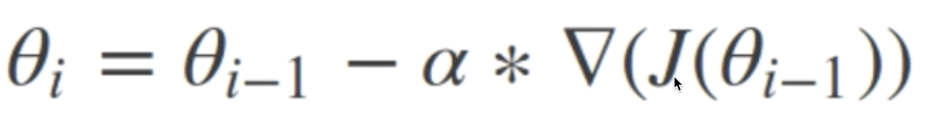

In [7]:
from IPython.display import Image
Image("gradiente.png")

In [8]:
# alfa = tasa de aprendizaje (learning rate)

In [9]:
alfa = 0.02

In [10]:
def descenso_gradiente(x):
    return x - alfa * f_prima(x)

In [11]:
min_iteraciones = []
ITERACIONES = 100

x = 3

for i in range(ITERACIONES):
    min_iteraciones.append(x)
    x = descenso_gradiente(x)    

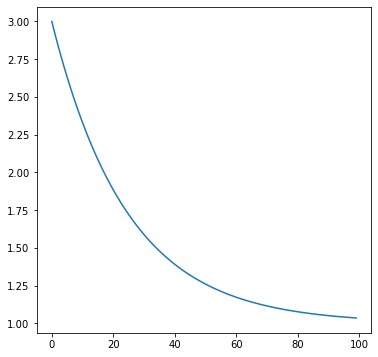

In [14]:
plt.plot(min_iteraciones)

In [15]:
# Batch Gradient Descent

In [16]:
from sklearn.datasets import make_regression

In [17]:
n_muestra = 1000
n_variable = 2


In [18]:
X, y, coeficientes_objetivos = make_regression(n_samples=n_muestra, n_features=n_variable, 
                                              coef=True)

In [19]:
X.shape

(1000, 2)

In [20]:
coeficientes_objetivos.shape

(2,)

In [21]:
coeficientes_objetivos

array([91.31361354, 85.85046661])

In [35]:
def prediccion_batch(coeficientes,X):
    return coeficientes @ X.T

In [24]:
y_predicciones = prediccion_batch(coeficientes_objetivos,X)
y_predicciones[:5]

array([ 138.64397434,  139.99615459, -159.16431754,  176.17183395,
         70.98569262])

In [26]:
y[:5] - y_predicciones[:5]

array([0., 0., 0., 0., 0.])

In [36]:
# Calculamos el error cuadratico medio 
def error_batch(y_prediccion, y_real):
    n = y_prediccion.shape[0]
    return (np.sum(y_prediccion-y_real)**2/2*n)

In [37]:
def derivada_error_batch(y_prediccion, y_real,x):
    n = y_prediccion.shape[0]
    return (np.sum(y_prediccion-y_real)*x/n)

In [30]:
coeficientes = np.random.random((X.shape[1],))
coeficientes

array([0.7432217 , 0.96260283])

In [38]:
def descenso_gradiente_batch(coef, X,y):
    y_predic = prediccion_batch(coef,X)
    for i in range(coef.shape[0]):
        coef[i] = coef[i] - alfa * derivada_error_batch(y_predic,y,X[:,i])
    error = error_batch(y_predic,y)
    return coef,error

In [41]:
coef_iteraciones = []
error_iteraciones = []

NUM_ITERACIONES = 300
coeficientes = np.random.random((X.shape[1],))
error = error_batch(coeficientes,X)
for i in range(NUM_ITERACIONES):
    coef_iteraciones.append(coef_iteraciones.copy())
    error_iteraciones.append(error)
    coeficientes,error = descenso_gradiente_batch(coeficientes,X,y)
    
coef_iteraciones = np.array(coef_iteraciones)

ValueError: setting an array element with a sequence.

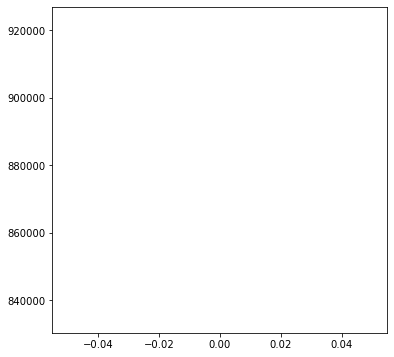

In [40]:
plt.plot(error_iteraciones)